# TOTA spending data.  

This notebook explores the spending data and potential visualizations.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math
import seaborn as sns

In [16]:
df = pd.read_csv('../data/spending_data_2018_2021_complete.csv')

df.head(20)

,Date,ITS Spend Category Name,Origin Tourism Region,Destination Tourism Region,Spend,Destination Province,Benchmark,Origin Country,Origin Country / Province,Year
0,2019-11-01,Clothes and Gifts,Kawartha and Northumberland,Rest of Newfoundland,3.146432e+03,Newfoundland and Labrador,Final,Canada,Ontario,2019
1,2019-12-01,Clothes and Gifts,Kawartha and Northumberland,Rest of Newfoundland,4.056945e+03,Newfoundland and Labrador,Final,Canada,Ontario,2019
2,2019-10-01,Clothes and Gifts,Kawartha and Northumberland,Rest of Newfoundland,3.507175e+03,Newfoundland and Labrador,Final,Canada,Ontario,2019
3,2018-04-01,Transportation,Fundy,River Valley,7.663258e+06,New Brunswick,Final,Canada,New Brunswick,2018
4,2018-05-01,Transportation,Fundy,River Valley,9.388367e+06,New Brunswick,Final,Canada,New Brunswick,2018
5,2018-06-01,Transportation,Fundy,River Valley,9.499675e+06,New Brunswick,Final,Canada,New Brunswick,2018
6,2018-08-01,Clothes and Gifts,Miramichi,Alberni-Clayoquot,0.000000e+00,British Columbia,Final,Canada,New Brunswick,2018
7,2018-07-01,Clothes and Gifts,Miramichi,Alberni-Clayoquot,0.000000e+00,British Columbia,Final,Canada,New Brunswick,2018
8,2018-09-01,Clothes and Gifts,Miramichi,Alberni-Clayoquot,0.000000e+00,British Columbia,Final,Canada,New Brunswick,2018
9,2020-09-01,Food and Beverage,Haliburton Highlands and the Ottawa Valley,Rest of Newfoundland,1.115483e+02,Newfoundland and Labrador,Final,Canada,Ontario,2020


## Check if all data is correct. 
- Provinces / Regions names
- Repeated dates?
- Equal coverage for dates / regions / category

#### Provinces / Regions names

In [3]:
df['Destination Province'].unique()

array(['Ontario', 'Northwest Territories', 'Nova Scotia', 'Manitoba',
       'British Columbia', 'Quebec', 'New Brunswick', 'Yukon', 'Nunavut',
       'Alberta', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Saskatchewan'], dtype=object)

In [20]:
df[df['Destination Province'] == 'British Columbia']['Origin Country / Province'].unique()

array(['New Brunswick', 'British Columbia', 'Manitoba', 'Quebec',
       'Prince Edward Island', 'Ontario', 'Nova Scotia', 'Saskatchewan',
       'Newfoundland and Labrador', 'Alberta', 'United States', 'France',
       'India', 'Rest of World', 'China', 'United Kingdom', 'Germany',
       'Japan', 'Mexico', 'Australia', 'South Korean'], dtype=object)

**NOTE: Destination regions will need translation**

#### Uniqueness of dates

In [12]:
df[df['Destination Province'] == 'British Columbia'].groupby(['Date', 'Benchmark'])['Year'].count()

Date        Benchmark  
2018-01-01  Final          18415
2018-02-01  Final          18415
2018-03-01  Final          18415
2018-04-01  Final          18454
2018-05-01  Final          18454
                           ...  
2021-09-01  Historic        7957
            Preliminary    10823
2021-10-01  Historic       18679
2021-11-01  Historic       18679
2021-12-01  Historic       18679
Name: Year, Length: 63, dtype: int64

## Check spending data

Group spending data to check results and ideas for visualizations

In [14]:
df[df['Destination Province'] == 'British Columbia'].groupby(['Origin Country', 'Year'])['Spend'].sum().reset_index()

,Origin Country,Year,Spend
0,Australia,2018,3.844380e+08
1,Australia,2019,3.761490e+08
2,Australia,2020,9.406476e+07
3,Australia,2021,4.022213e+07
4,Canada,2018,1.018748e+10
5,Canada,2019,1.015109e+10
6,Canada,2020,6.830266e+09
7,Canada,2021,8.630381e+09
8,China,2018,8.468020e+08
9,China,2019,7.487100e+08


In [13]:
origin='United States'
year=2021

df_plt = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == year) & (df['Origin Country'] == origin)].\
groupby(['Origin Country', 'Date', 'ITS Spend Category Name'])['Spend'].sum().reset_index()
df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))
df_plt['Date'].unique()

array(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
       '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
       '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
      dtype=object)

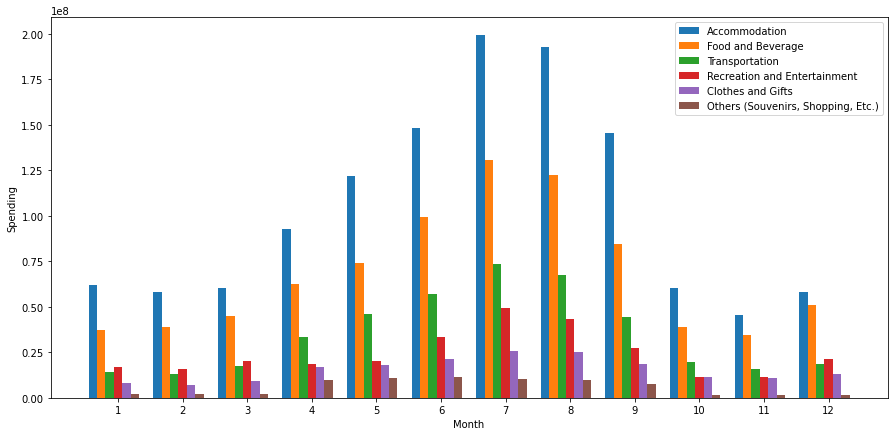

In [15]:
fig=plt.figure(figsize=(15,7))

wd = 0.13
pos = wd*-3
#cat=df_plt['ITS Spend Category Name'].unique()
cat = ['Accommodation', 'Food and Beverage','Transportation',\
       'Recreation and Entertainment', 'Clothes and Gifts', 'Others (Souvenirs, Shopping, Etc.)']


for i in range(len(cat)):
    df_ax = df_plt[df_plt['ITS Spend Category Name'] == cat[i]]
    
    plt.bar(df_ax['Month']+pos, df_ax['Spend'], wd)
    pos = pos+wd
    
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Spending")
plt.legend(cat)
plt.show()



In [24]:
def plot_spending_item(df, origin, year):

    df_plt = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == year) & (df['Origin Country'] == origin)].\
    groupby(['Origin Country', 'Date', 'ITS Spend Category Name'])['Spend'].sum().reset_index()
    df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))
    
    fig=plt.figure(figsize=(15,7))
    
    #max_val = df['Spend'].max()+(df['Spend'].max()*0.1)
    max_val = 200000000
    
    wd = 0.13
    pos = wd*-3
    #cat=df_plt['ITS Spend Category Name'].unique()
    cat = ['Accommodation', 'Food and Beverage','Transportation',\
           'Recreation and Entertainment', 'Clothes and Gifts', 'Others (Souvenirs, Shopping, Etc.)']
    
    
    for i in range(len(cat)):
        df_ax = df_plt[df_plt['ITS Spend Category Name'] == cat[i]]
        
        plt.bar(df_ax['Month']+pos, df_ax['Spend'], wd)
        plt.ylim((0, max_val*1.1))
        pos = pos+wd
        
    plt.xticks(range(1,13))
    plt.xlabel("Month")
    plt.ylabel("Spending")
    plt.legend(cat)
    plt.show()

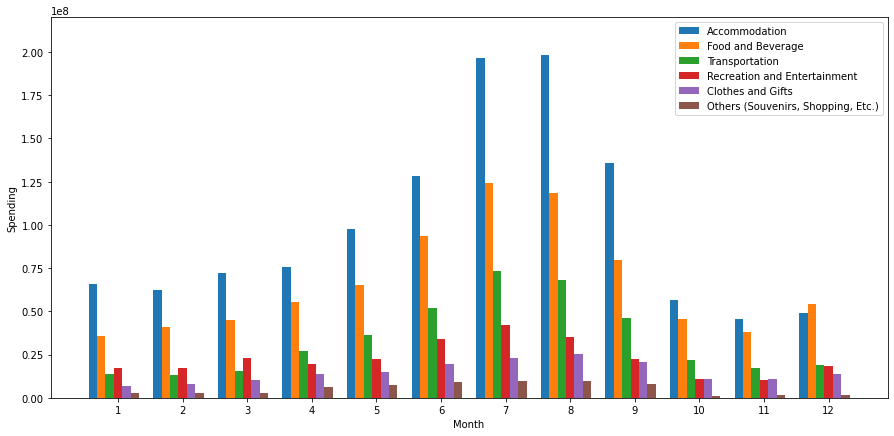

In [25]:
origin='United States'
year=2018
plot_spending_item(df, origin, year)

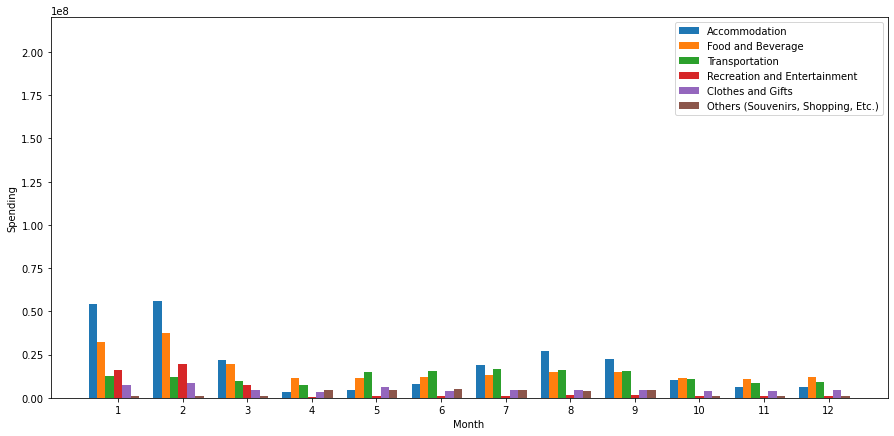

In [18]:
origin='United States'
year=2020
plot_spending_item(df, origin, year)

In [33]:
df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == 2019)].groupby('Origin Country')['Spend'].sum().sort_values(ascending=False)

Origin Country
Canada            1.015109e+10
United States     3.031128e+09
Rest of World     1.126293e+09
China             7.487100e+08
United Kingdom    4.506440e+08
Australia         3.761490e+08
Germany           2.458820e+08
Mexico            2.335320e+08
Japan             2.095980e+08
South Korean      1.917080e+08
France            8.739500e+07
India             5.305500e+07
Name: Spend, dtype: float64

In [70]:
def plot_spending_country(df, year, domestic=False):
    
    group_origin = {'Mexico':'Rest of World', 'Japan':'Rest of World',
                    'South Korean':'Rest of World', 'France':'Rest of World', 'India':'Rest of World'}

    df_plt = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == year)].\
    groupby(['Origin Country', 'Date'])['Spend'].sum().reset_index()
    df_plt['Month'] = df_plt['Date'].apply(lambda x: int(x[5:7]))
    
    df_plt['Origin Country'].replace(group_origin, inplace = True)                
    
    if domestic:
        df_plt = df_plt[df_plt['Origin Country'] == 'Canada']
        max_val = 2000000000
        wd = 0.5
        pos = 0
    else:
        df_plt = df_plt[df_plt['Origin Country'] != 'Canada']
        max_val = 450000000
        wd = 0.1
        pos = wd*-3
    
    cat=df_plt['Origin Country'].unique()

    
    fig=plt.figure(figsize=(15,7))
    
    for i in range(len(cat)):
        df_ax = df_plt[df_plt['Origin Country'] == cat[i]]
        
        plt.bar(df_ax['Month']+pos, df_ax['Spend'], wd)
        plt.ylim((0, max_val*1.1))
        pos = pos+wd
        
    plt.xticks(range(1,13))
    plt.xlabel("Month")
    plt.ylabel("Spending")
    plt.legend(cat)
    plt.show()

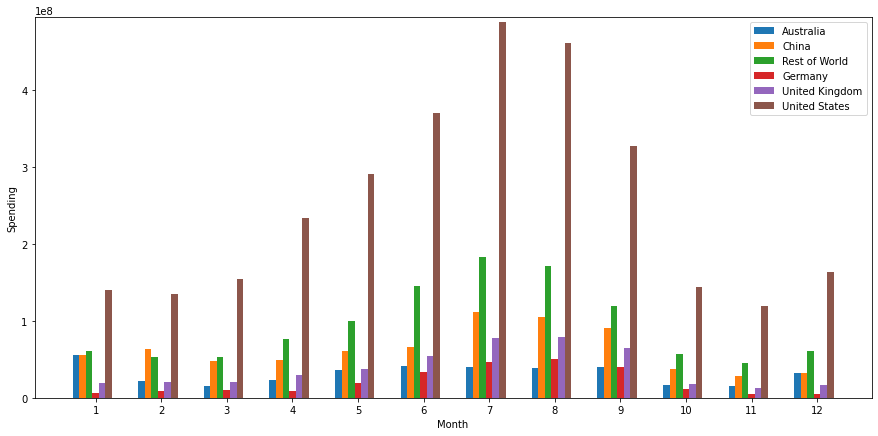

In [71]:
year=2019
domestic = False
plot_spending_country(df, year, domestic)

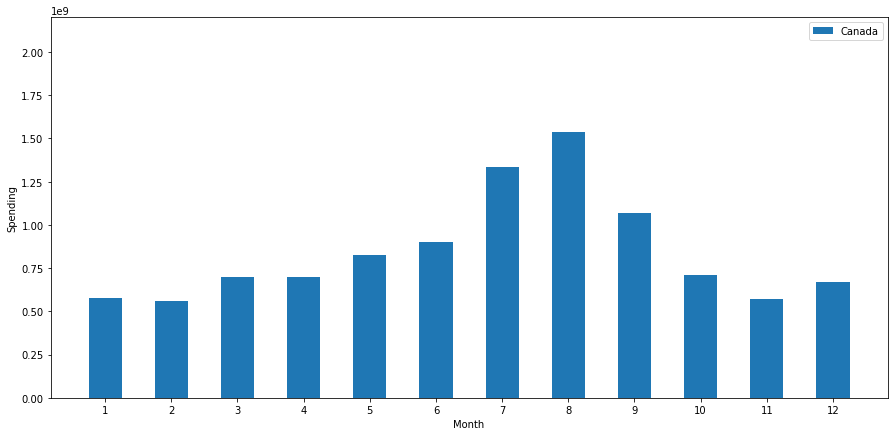

In [72]:
year=2019
domestic = True
plot_spending_country(df, year, domestic)

For BC: BC + all the lines of the destination regions  
In the regions: line for the region + all of BC

In [83]:
test_spend = df[(df['Destination Province'] == 'British Columbia') & (df['Year'] == 2019)].\
    groupby(['Origin Country', 'ITS Spend Category Name'])['Spend'].sum().to_frame()
test_spend

Spend
Origin Country ITS Spend Category Name                         
Australia      Accommodation                       1.468640e+08
               Clothes and Gifts                   3.153500e+07
               Food and Beverage                   9.421200e+07
               Others (Souvenirs, Shopping, Etc.)  4.197000e+06
               Recreation and Entertainment        6.127400e+07
...                                                         ...
United States  Clothes and Gifts                   1.845690e+08
               Food and Beverage                   8.187620e+08
               Others (Souvenirs, Shopping, Etc.)  7.158000e+07
               Recreation and Entertainment        2.904220e+08
               Transportation                      4.212890e+08

[72 rows x 1 columns]

In [19]:

df['Origin'] = np.where(df['Origin Country'] == 'Canada', 'Domestic', 'International')


total_bc = df[df['Destination Province'] == 'British Columbia'].groupby(['Origin', 'Year'])['Spend'].sum().reset_index()
total_bc['Destination'] = 'British Columbia'


total_bc

,Origin,Year,Spend,Destination
0,Domestic,2018,1.018748e+10,British Columbia
1,Domestic,2019,1.015109e+10,British Columbia
2,Domestic,2020,6.830266e+09,British Columbia
3,Domestic,2021,6.457845e+09,British Columbia
4,International,2018,6.608703e+09,British Columbia
5,International,2019,6.754094e+09,British Columbia
6,International,2020,1.722636e+09,British Columbia
7,International,2021,2.041651e+09,British Columbia


In [18]:
total_prov = df[df['Destination Province'] == 'British Columbia'].groupby(['Origin','Destination Tourism Region', 'Year'])['Spend'].sum().reset_index()
total_prov['Destination'] = total_prov['Destination Tourism Region']
total_prov.drop(columns=['Destination Tourism Region'], inplace = True)
total_prov

,Origin,Year,Spend,Destination
0,Domestic,2018,6.444321e+08,Alberni-Clayoquot
1,Domestic,2019,5.776001e+08,Alberni-Clayoquot
2,Domestic,2020,4.518970e+08,Alberni-Clayoquot
3,Domestic,2021,4.368953e+08,Alberni-Clayoquot
4,Domestic,2018,6.660806e+08,Capital
...,...,...,...,...
171,International,2021,6.246799e+07,Thompson-Nicola
172,International,2018,1.302099e+07,Whistler
173,International,2019,1.941761e+08,Whistler
174,International,2020,1.075131e+08,Whistler


In [21]:
total_combined = pd.concat([total_bc, total_prov])
total_combined

,Origin,Year,Spend,Destination
0,Domestic,2018,1.018748e+10,British Columbia
1,Domestic,2019,1.015109e+10,British Columbia
2,Domestic,2020,6.830266e+09,British Columbia
3,Domestic,2021,6.457845e+09,British Columbia
4,International,2018,6.608703e+09,British Columbia
...,...,...,...,...
171,International,2021,6.246799e+07,Thompson-Nicola
172,International,2018,1.302099e+07,Whistler
173,International,2019,1.941761e+08,Whistler
174,International,2020,1.075131e+08,Whistler


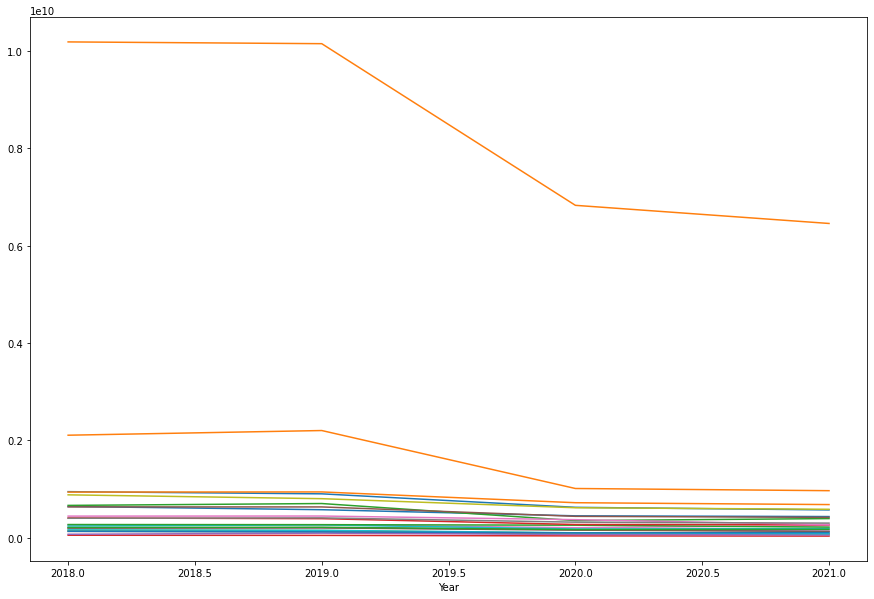

In [33]:
fig=plt.figure(figsize=(15,10))

df_plt = total_combined[total_combined['Origin'] == 'Domestic'].set_index('Year')
df_plt.groupby('Destination')['Spend'].plot()
plt.show()